In [7]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 

In [8]:
df = pd.read_csv(r'C:\Users\sangeetha\Downloads\Features_data_set - Features_data_set.csv')
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [11]:
df1 = pd.read_csv(r'C:\Users\sangeetha\Downloads\sales_data_set - sales_data_set.csv')
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [13]:
df2 = pd.read_csv(r'C:\Users\sangeetha\Downloads\stores_data_set.csv')
df2

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [15]:
df3 = pd.merge(df2,df,on = 'Store')
df3

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,A,151315,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,A,151315,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,A,151315,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,B,118221,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,B,118221,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,B,118221,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,B,118221,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [16]:
df4 = pd.merge(df3, df1, on = ['Store','Date'])
df4

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
0,1,A,151315,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,False
1,1,A,151315,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,False
2,1,A,151315,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,False
3,1,A,151315,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,False
4,1,A,151315,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,B,118221,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80,False
421566,45,B,118221,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31,False
421567,45,B,118221,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47,False
421568,45,B,118221,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48,False


In [17]:
df_ = df4.copy()
df_

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
0,1,A,151315,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,False
1,1,A,151315,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,False
2,1,A,151315,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,False
3,1,A,151315,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,False
4,1,A,151315,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,B,118221,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80,False
421566,45,B,118221,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31,False
421567,45,B,118221,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47,False
421568,45,B,118221,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48,False


In [18]:
df_['Date'] = df_['Date'].apply(lambda x:x.replace('/','-'))
df_['Date'] = pd.to_datetime(df_['Date'],format = '%d-%m-%Y',errors = 'coerce')

In [19]:
df_['Day'] = df_['Date'].dt.day 
df_['Month'] = df_['Date'].dt.month
df_['Year'] = df_['Date'].dt.year

df_.drop('Date',axis = 1,inplace = True)
df_.drop('IsHoliday_y',axis = 1, inplace = True)
df_.rename(columns = {'IsHoliday_x':'IsHoliday'} ,inplace = True)

In [20]:
df_['MarkDown1'].fillna(0,inplace = True)
df_['MarkDown2'].fillna(0,inplace = True)
df_['MarkDown3'].fillna(0,inplace = True)
df_['MarkDown4'].fillna(0,inplace = True)
df_['MarkDown5'].fillna(0,inplace = True)
df_

,Store,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Day,Month,Year
0,1,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,1,24924.50,5,2,2010
1,1,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,2,50605.27,5,2,2010
2,1,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,3,13740.12,5,2,2010
3,1,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,4,39954.04,5,2,2010
4,1,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,5,32229.38,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80,26,10,2012
421566,45,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31,26,10,2012
421567,45,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47,26,10,2012
421568,45,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48,26,10,2012


In [21]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  int64  
 3   Temperature   421570 non-null  float64
 4   Fuel_Price    421570 non-null  float64
 5   MarkDown1     421570 non-null  float64
 6   MarkDown2     421570 non-null  float64
 7   MarkDown3     421570 non-null  float64
 8   MarkDown4     421570 non-null  float64
 9   MarkDown5     421570 non-null  float64
 10  CPI           421570 non-null  float64
 11  Unemployment  421570 non-null  float64
 12  IsHoliday     421570 non-null  bool   
 13  Dept          421570 non-null  int64  
 14  Weekly_Sales  421570 non-null  float64
 15  Day           421570 non-null  int32  
 16  Month         421570 non-null  int32  
 17  Year          421570 non-null  int32  
dtypes: b

In [22]:
df_['IsHoliday'] = OrdinalEncoder().fit_transform(df_[['IsHoliday']])
df_['Type'] = OrdinalEncoder().fit_transform(df_[['Type']])

In [23]:
df_.dtypes

Store             int64
Type            float64
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday       float64
Dept              int64
Weekly_Sales    float64
Day               int32
Month             int32
Year              int32
dtype: object

In [24]:
df_.isnull().sum()

Store           0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Dept            0
Weekly_Sales    0
Day             0
Month           0
Year            0
dtype: int64

In [25]:
(df_['Weekly_Sales']<=0).sum()

1358

In [26]:
df_['Weekly_Sales'] = df_['Weekly_Sales'].apply(lambda x :0 if x<0 else x)

In [27]:
(df_['Weekly_Sales']<0).sum()

0

In [28]:
df_ = df_[['Day','Month','Year','Store','Dept','Type','Weekly_Sales','Size','IsHoliday','Temperature',
           'Fuel_Price', 'MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']]
df_

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,5,2,2010,1,1,0.0,24924.50,151315,0.0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
1,5,2,2010,1,2,0.0,50605.27,151315,0.0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
2,5,2,2010,1,3,0.0,13740.12,151315,0.0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
3,5,2,2010,1,4,0.0,39954.04,151315,0.0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
4,5,2,2010,1,5,0.0,32229.38,151315,0.0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,26,10,2012,45,93,1.0,2487.80,118221,0.0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,26,10,2012,45,94,1.0,5203.31,118221,0.0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,26,10,2012,45,95,1.0,56017.47,118221,0.0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,26,10,2012,45,97,1.0,6817.48,118221,0.0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


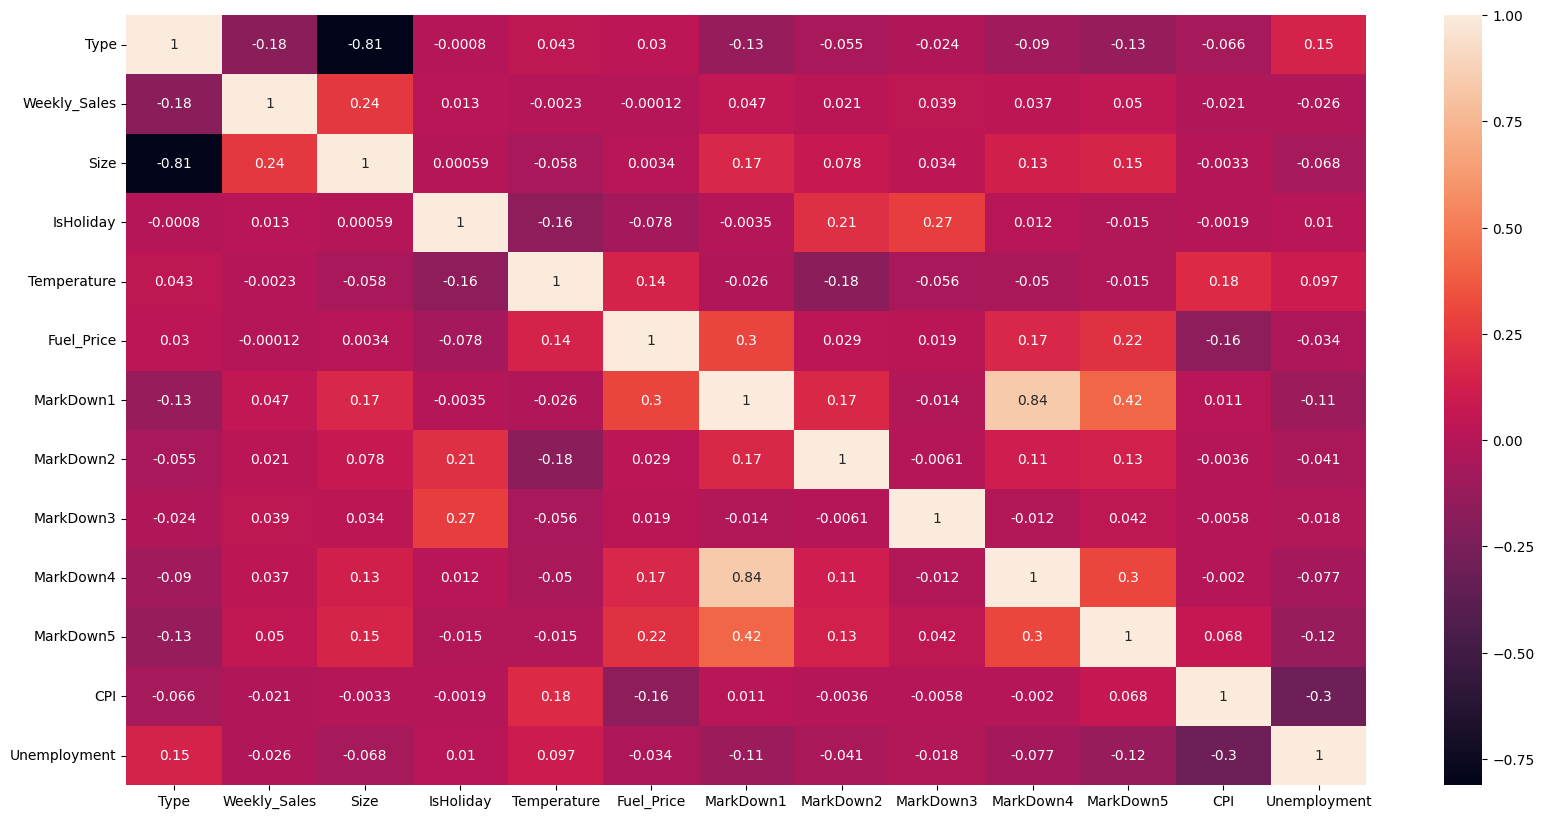

In [29]:
df_corr = df_.drop(columns = ['Day','Month','Year','Store','Dept']).corr()

plt.figure(figsize=(20,10))
sns.heatmap(df_corr,annot = True)
plt.show()

In [30]:
df_x = df_.drop('MarkDown1',axis = 1)
y = df_['MarkDown1']

In [31]:
x_train,x_test,y_train,y_test = train_test_split(df_x,y,test_size = 0.15,random_state = 42)

In [32]:
model =  RandomForestRegressor()
result = model.fit(x_train,y_train)
y_pred = result.predict(x_test)

In [23]:
result.score(x_test, y_test)

1.0

In [ ]:
model1 = AdaBoostRegressor()
result1 = model1.fit(x_train,y_train)
y_pred1 = result1.predict(x_test)

In [59]:
result1.score(x_test,y_test)

0.2294474731050874

In [33]:
model2 = GradientBoostingRegressor()
result2 = model2.fit(x_train,y_train)
y_pred2 = result2.predict(x_test)
result2.score(x_test,y_test)

0.9158058687578277

In [69]:
model3 = DecisionTreeRegressor()
result3 = model3.fit(x_train,y_train)
y_pred4 = result3.predict(x_test)
result3.score(x_test,y_test)

1.0

In [58]:
file = open('MarkdownPrediction.pkl','wb')
pickle.dump(result2,file)
file.close()

In [ ]:
df_pred = np.array([[3,2.,151315,77.55,3.92,254.39,7.89,0.,0.,214.7212488, 8.36,0.,65,13740.12,1,6,2010]])

In [95]:
df_pred1 = model2.predict(df_pred)
print(df_pred1)

[730.49754597]


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [36]:
x1 = df_.drop('IsHoliday', axis = 1)
y1 = df_['IsHoliday']

In [38]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.15,random_state = 42)

In [39]:
model4 = RandomForestClassifier()
result4 = model4.fit(x1_train,y1_train)
y1_pred = result4.predict(x1_test)
accuracy_score(y1_test,y1_pred)

1.0

In [25]:
model5 = AdaBoostClassifier()
result5 = model5.fit(x1_train,y1_train)
y1_pred1 = result5.predict(x1_test)
accuracy_score(y1_test,y1_pred)

1.0

In [26]:
model6 = GradientBoostingClassifier()
result6 = model6.fit(x1_train,y1_train)
y1_pred2 = result6.predict(x1_test)
accuracy_score(y1_test,y1_pred)

1.0

In [27]:
model7 = DecisionTreeClassifier()
result7 = model7.fit(x1_train,y1_train)
y1_pred3 = result7.predict(x1_test)
accuracy_score(y1_test,y1_pred)

1.0

In [41]:
y1_prediction = np.array([[15,7,2010,2,1,4,50605.27,39910,38.51,3.404,4018.91,20.64,3.18,0.,1537.49,211.2421698,7.224]])

In [42]:
y1_prediction1 = result4.predict(y1_prediction)
y1_prediction1

C:\Users\sangeetha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0.])

In [45]:
file1 = open('IsHolidayPrediction.pkl','wb')
pickle.dump(result4,file1)
file1.close()

In [46]:
x2 = df_.drop('Unemployment',axis = 1)
y2 = df_['Unemployment']

In [47]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size = 0.15,random_state = 42)

In [68]:
model8 = RandomForestRegressor()
result8 = model8.fit(x2_train,y2_train)
y_pred8 = result8.predict(x2_test)
result8.score(x2_test,y2_test)

1.0

In [69]:
model9 = AdaBoostRegressor()
result9 = model9.fit(x2_train,y2_train)
y_pred9 = result9.predict(x2_test)
result9.score(x2_test,y2_test)

0.4863079998744334

In [48]:
model10 = GradientBoostingRegressor()
result10 = model10.fit(x2_train,y2_train)
y_pred10 = result10.predict(x2_test)
result10.score(x2_test,y2_test)

0.9566499623572332

In [72]:
model11= DecisionTreeRegressor()
result11 = model11.fit(x2_train,y2_train)
y_pred11 = result11.predict(x2_test)
result11.score(x2_test,y2_test)

1.0

In [75]:
y2_prediction = np.array([[15,7,2010,2,1,4,50605.27,39910,0.,38.51,3.404,4018.91,20.64,3.18,0.,1537.49,211.2421698]])

In [76]:
y2_prediction2 = result10.predict(y2_prediction)
y2_prediction2

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([8.29382798])

In [49]:
file3 = open("Unemp.pkl","wb")
pickle.dump(result10,file3)
file3.close()

In [50]:
x3 = df_.drop('Type', axis = 1)
y3 = df_['Type']

In [51]:
x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y3,test_size = 0.15,random_state = 42)

In [80]:
model12 = RandomForestClassifier()
result12 = model12.fit(x3_train,y3_train)
y12_pred = result12.predict(x3_test)
accuracy_score(y3_test,y12_pred)

1.0

In [52]:
model13 = AdaBoostClassifier()
result13 = model13.fit(x3_train,y3_train)
y13_pred = result13.predict(x3_test)
accuracy_score(y3_test,y13_pred)

0.7056265418432538

In [ ]:
model14 = GradientBoostingClassifier()
result14 = model14.fit(x3_train,y3_train)
y14_pred = result14.predict(x3_test)
accuracy_score(y3_test,y14_pred)

In [84]:
model15 = DecisionTreeClassifier()
result15 = model15.fit(x3_train,y3_train)
y15_pred = result15.predict(x3_test)
accuracy_score(y3_test,y15_pred)

1.0

In [90]:
y3_prediction = np.array([[15,7,2010,3,1,50605.27,39910,0.,38.51,3.404,4018.91,20.64,3.18,0.,1537.49,211.2421698,10.256]])

In [91]:
y3_prediction3 = result13.predict(y3_prediction)
y3_prediction3

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


array([0.])

In [56]:
file4 = open('Type_prediction.pkl','wb')
pickle.dump(result13,file4)
file4.close()